パーセプトロンの実装


In [6]:
# 簡単なパーセプトロン
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1


print(AND(0, 0))
print(AND(1, 0))
print(AND(0, 1))
print(AND(1, 1))

0
0
0
1


In [7]:
# 重みとバイアスの導入
import numpy as np

x = np.array([0, 1])  # 入力
w = np.array([0.5, 0.5])  # 重み
b = -0.7

w * x

np.sum(w * x)
np.sum(w * x) + b

np.float64(-0.19999999999999996)

In [8]:
# 重みとバイアスによる実装
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1


def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1


def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1


print(AND(0.5, 2))

1


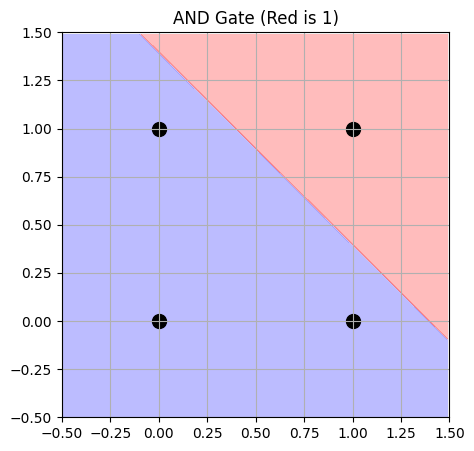

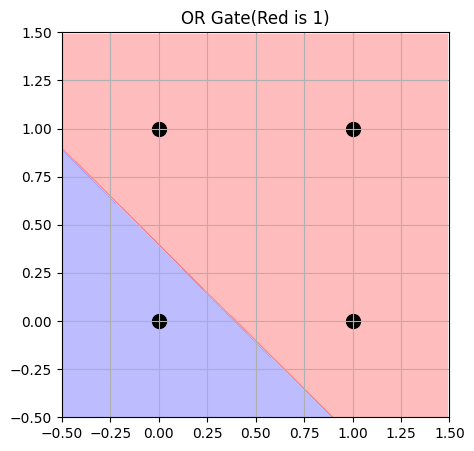

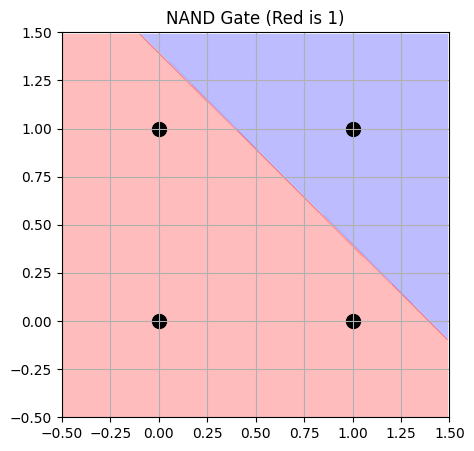

In [9]:
# +a1:グラフであらわしてみよう
import numpy as np
import matplotlib.pyplot as plt


def predict_logic(w, b, x1, x2):
    # 行列演算でまとめて計算
    tmp = w[0] * x1 + w[1] * x2 + b
    return (tmp > 0).astype(int)


def plot_decision_region(w, b, title="Logic Gate"):
    # データ点
    x_data = np.array([0, 1, 0, 1])
    y_data = np.array([0, 0, 1, 1])

    plt.figure(figsize=(5, 5))
    plt.title(title)

    # --- 領域の塗りつぶしロジック ---
    # 1. 細かいグリッドを作る (-0.5から1.5までを0.01刻みで)
    xx, yy = np.meshgrid(np.arange(-0.5, 1.5, 0.01), np.arange(-0.5, 1.5, 0.01))

    # 2. グリッドの全点について予測を実行
    # (ravelで一列にしてから計算し、reshapeで元の形に戻す)
    Z = predict_logic(w, b, xx.ravel(), yy.ravel())
    Z = Z.reshape(xx.shape)

    # 3. 等高線で色を塗る (0=青エリア, 1=赤エリア)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="bwr")
    # ---------------------------

    # データ点のプロット
    plt.scatter(x_data, y_data, c="black", s=100, label="Inputs")

    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.grid()
    plt.show()


# ANDとOR，そしてNANDを比較してみよう
w_and = np.array([0.5, 0.5])
b_and = -0.7
plot_decision_region(w_and, b_and, "AND Gate (Red is 1)")

w_or = np.array([0.5, 0.5])
b_or = -0.2
plot_decision_region(w_or, b_or, "OR Gate(Red is 1)")

w_nand = np.array([-0.5, -0.5])
b_nand = 0.7
plot_decision_region(w_nand, b_nand, "NAND Gate (Red is 1)")

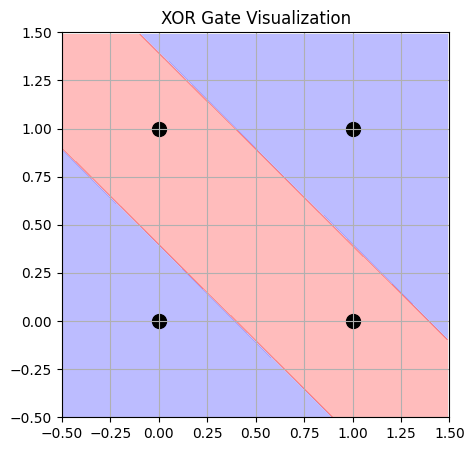

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 以前定義した基本ゲートがないと動かないので、念のため再定義
# (君の手元のコードにあるならここは飛ばしていい)
def AND(x1, x2):
    w, b = np.array([0.5, 0.5]), -0.7
    return int(np.sum(w * np.array([x1, x2])) + b > 0)


def NAND(x1, x2):
    w, b = np.array([-0.5, -0.5]), 0.7
    return int(np.sum(w * np.array([x1, x2])) + b > 0)


def OR(x1, x2):
    w, b = np.array([0.5, 0.5]), -0.2
    return int(np.sum(w * np.array([x1, x2])) + b > 0)


# --- ここから本題 ---


def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y


# ★関数(model)を渡せるように改良したプロット関数★
def plot_logic_function(model_func, title="Logic Gate"):
    # データ点
    x_data = np.array([0, 1, 0, 1])
    y_data = np.array([0, 0, 1, 1])

    plt.figure(figsize=(5, 5))
    plt.title(title)

    # 1. メッシュグリッド作成
    xx, yy = np.meshgrid(np.arange(-0.5, 1.5, 0.01), np.arange(-0.5, 1.5, 0.01))

    # 2. 関数を使って予測 (ここが以前と違う！w, bではなく関数を使う)
    # NumPy配列を一気に処理できないシンプルな関数のため、vectorizeして適用
    predict_vectorized = np.vectorize(model_func)
    Z = predict_vectorized(xx, yy)

    # 3. 塗りつぶし
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="bwr")  # 青=0, 赤=1

    # データ点プロット
    plt.scatter(x_data, y_data, c="black", s=100, label="Inputs")

    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.grid()
    plt.show()


# 実行せよ
plot_logic_function(XOR, "XOR Gate Visualization")